# T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)" data-toc-modified-id="T.-Rowe-Price-Institutional-Large-Cap-Core-Growth-Fund-(TPLGX)-1">T. Rowe Price Institutional Large Cap Core Growth Fund (TPLGX)</a></span></li><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-2">Set Up</a></span></li><li><span><a href="#Read-Data" data-toc-modified-id="Read-Data-3">Read Data</a></span><ul class="toc-item"><li><span><a href="#Sample-the-data" data-toc-modified-id="Sample-the-data-3.1">Sample the data</a></span></li></ul></li><li><span><a href="#Rata-Die" data-toc-modified-id="Rata-Die-4">Rata Die</a></span></li><li><span><a href="#Draw-Plots" data-toc-modified-id="Draw-Plots-5">Draw Plots</a></span></li><li><span><a href="#Extract-only-the-desired-data" data-toc-modified-id="Extract-only-the-desired-data-6">Extract only the desired data</a></span></li><li><span><a href="#Quantize-(normalize)-the-data" data-toc-modified-id="Quantize-(normalize)-the-data-7">Quantize (normalize) the data</a></span></li><li><span><a href="#Fill-in-Empty-Dates" data-toc-modified-id="Fill-in-Empty-Dates-8">Fill in Empty Dates</a></span></li><li><span><a href="#Averages" data-toc-modified-id="Averages-9">Averages</a></span></li><li><span><a href="#Position-on-given-Date" data-toc-modified-id="Position-on-given-Date-10">Position on given Date</a></span></li><li><span><a href="#Save-DataFrame-to-CSV-file" data-toc-modified-id="Save-DataFrame-to-CSV-file-11">Save DataFrame to CSV file</a></span></li></ul></div>

# Set Up

In [1]:
show_help = false
include("MarketIndicators.jl") 
println()

# Read Data

In [2]:
#data = available_datasets() # uncomment to see all available datasets

dataset_file_name = "TPLGX.csv"
df = fetch_dataset(dataset_file_name, "yyyy_mm_dd")
record_count = size(df)[1]

using Statistics
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Nothing,DataType
1,Date,,2019-09-17,,2020-10-30,285,,String
2,Open,51.4339,37.11,50.44,65.53,,,Float64
3,High,51.4339,37.11,50.44,65.53,,,Float64
4,Low,51.4339,37.11,50.44,65.53,,,Float64
5,Close,51.4339,37.11,50.44,65.53,,,Float64
6,Adj Close,51.3708,37.11,50.44,65.53,,,Float64
7,Volume,0.0,0,0.0,0,,,Int64


## Sample the data

In [3]:
columns = preview_data(df) # uncomment to see the data
println()

12×7 DataFrame
│ Row │ Date       │ Open    │ High    │ Low     │ Close   │ Adj Close │
│     │ String     │ Float64 │ Float64 │ Float64 │ Float64 │ Float64   │
├─────┼────────────┼─────────┼─────────┼─────────┼─────────┼───────────┤
│ 1   │ 2019-09-17 │ 46.0    │ 46.0    │ 46.0    │ 46.0    │ 45.7234   │
│ 2   │ 2019-10-21 │ 45.02   │ 45.02   │ 45.02   │ 45.02   │ 44.7493   │
│ 3   │ 2019-11-22 │ 47.11   │ 47.11   │ 47.11   │ 47.11   │ 46.8267   │
│ 4   │ 2019-12-30 │ 48.65   │ 48.65   │ 48.65   │ 48.65   │ 48.65     │
│ 5   │ 2020-02-04 │ 51.6    │ 51.6    │ 51.6    │ 51.6    │ 51.6      │
│ 6   │ 2020-03-10 │ 45.97   │ 45.97   │ 45.97   │ 45.97   │ 45.97     │
│ 7   │ 2020-04-14 │ 46.41   │ 46.41   │ 46.41   │ 46.41   │ 46.41     │
│ 8   │ 2020-05-18 │ 50.65   │ 50.65   │ 50.65   │ 50.65   │ 50.65     │
│ 9   │ 2020-06-22 │ 54.36   │ 54.36   │ 54.36   │ 54.36   │ 54.36     │
│ 10  │ 2020-07-27 │ 57.06   │ 57.06   │ 57.06   │ 57.06   │ 57.06     │
│ 11  │ 2020-08-28 │ 63.59   │ 63.59

# Rata Die

In [4]:
insert!(df, 1, zeros(Int64, record_count), :Rata_Die)
update_rata_die!(df, 1, 2)
first(df, 6)
columns = preview_data(df)
println(

12×8 DataFrame
│ Row │ Rata_Die │ Date       │ Open    │ High    │ Low     │ Close   │
│     │ Int64    │ String     │ Float64 │ Float64 │ Float64 │ Float64 │
├─────┼──────────┼────────────┼─────────┼─────────┼─────────┼─────────┤
│ 1   │ 737319   │ 2019-09-17 │ 46.0    │ 46.0    │ 46.0    │ 46.0    │
│ 2   │ 737353   │ 2019-10-21 │ 45.02   │ 45.02   │ 45.02   │ 45.02   │
│ 3   │ 737385   │ 2019-11-22 │ 47.11   │ 47.11   │ 47.11   │ 47.11   │
│ 4   │ 737423   │ 2019-12-30 │ 48.65   │ 48.65   │ 48.65   │ 48.65   │
│ 5   │ 737459   │ 2020-02-04 │ 51.6    │ 51.6    │ 51.6    │ 51.6    │
│ 6   │ 737494   │ 2020-03-10 │ 45.97   │ 45.97   │ 45.97   │ 45.97   │
│ 7   │ 737529   │ 2020-04-14 │ 46.41   │ 46.41   │ 46.41   │ 46.41   │
│ 8   │ 737563   │ 2020-05-18 │ 50.65   │ 50.65   │ 50.65   │ 50.65   │
│ 9   │ 737598   │ 2020-06-22 │ 54.36   │ 54.36   │ 54.36   │ 54.36   │
│ 10  │ 737633   │ 2020-07-27 │ 57.06   │ 57.06   │ 57.06   │ 57.06   │
│ 11  │ 737665   │ 2020-08-28 │ 63.59   │ 63.59  

LoadError: syntax: incomplete: premature end of input

# Draw Plots

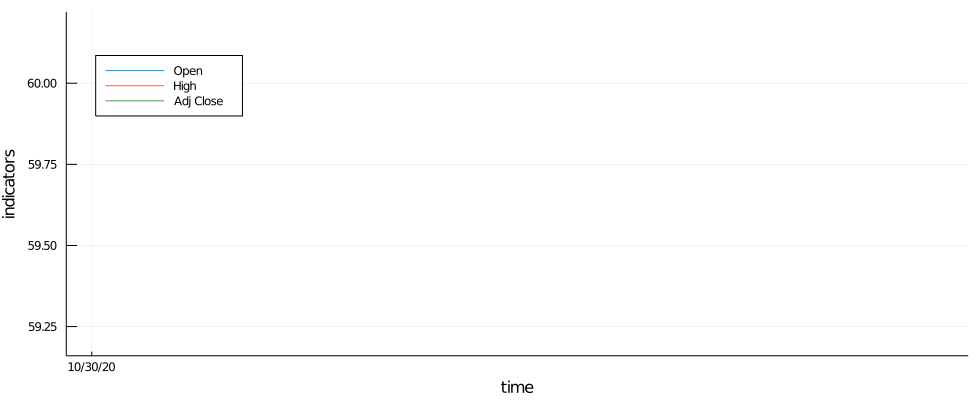

In [5]:
using Plots

record_count = size(df)[1]
rows = record_count-00:record_count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3] df[rows,4]  df[rows,7]     ], # y-axis
    label    = [  columns[3] columns[4]  columns[7]   "" ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Extract only the desired data

In [6]:
using DataFrames
df = DataFrame( Day = df[:,1], 
                Date = df[:,2],
                High = df[:,4]
               )

columns = preview_data(df)
println()

12×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 737319 │ 2019-09-17 │ 46.0    │
│ 2   │ 737353 │ 2019-10-21 │ 45.02   │
│ 3   │ 737385 │ 2019-11-22 │ 47.11   │
│ 4   │ 737423 │ 2019-12-30 │ 48.65   │
│ 5   │ 737459 │ 2020-02-04 │ 51.6    │
│ 6   │ 737494 │ 2020-03-10 │ 45.97   │
│ 7   │ 737529 │ 2020-04-14 │ 46.41   │
│ 8   │ 737563 │ 2020-05-18 │ 50.65   │
│ 9   │ 737598 │ 2020-06-22 │ 54.36   │
│ 10  │ 737633 │ 2020-07-27 │ 57.06   │
│ 11  │ 737665 │ 2020-08-28 │ 63.59   │
│ 12  │ 737700 │ 2020-10-02 │ 60.25   │
 Dataset dimentions: (285, 3)

 Column numbering:
1 Day
2 Date
3 High



# Quantize (normalize) the data

In [7]:
data_original = df[:,3] # keep original for display comparison later

quantize_column!(df, 3)

columns = preview_data(df)
println()

bias for 0 value: -1.3057707111731671
Normalization was performend using formula y=(((x-min)/(max-min))*255)-128 
minimum = 37.110001
maximum = 65.529999
Save these values for later to run model preditions
12×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 737319 │ 2019-09-17 │ -48.0   │
│ 2   │ 737353 │ 2019-10-21 │ -57.0   │
│ 3   │ 737385 │ 2019-11-22 │ -38.0   │
│ 4   │ 737423 │ 2019-12-30 │ -24.0   │
│ 5   │ 737459 │ 2020-02-04 │ 2.0     │
│ 6   │ 737494 │ 2020-03-10 │ -49.0   │
│ 7   │ 737529 │ 2020-04-14 │ -45.0   │
│ 8   │ 737563 │ 2020-05-18 │ -7.0    │
│ 9   │ 737598 │ 2020-06-22 │ 27.0    │
│ 10  │ 737633 │ 2020-07-27 │ 51.0    │
│ 11  │ 737665 │ 2020-08-28 │ 110.0   │
│ 12  │ 737700 │ 2020-10-02 │ 80.0    │
 Dataset dimentions: (285, 3)

 Column numbering:
1 Day
2 Date
3 High



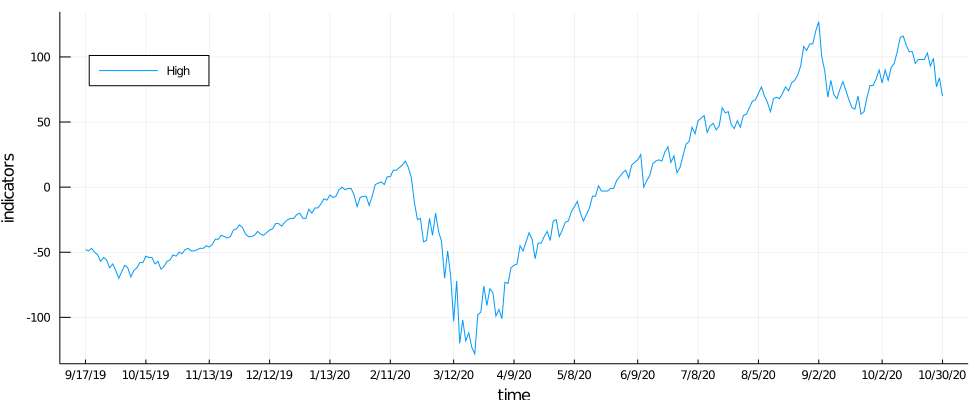

In [8]:
using Plots

count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [  columns[3] ""   ]  ,
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Fill in Empty Dates

In [9]:
for i in 1:count-1
    day_this = df[i,1]
    day_next = df[i+1,1]
    
    value = df[i,3] # assuming that the last known value is still valid
    
    # loop thru all days you need to insert
    # if there is no gap, nothing will happen
    for day in day_this+1:day_next-1
        date_string = Dates.format(rata2datetime(day), "yyyy-mm-dd")
        push!(df, [ day date_string value ])
    end
    
end

sort!(df, [:Day]);
count = size(df)[1]
columns = preview_data(df)
println()

13×3 DataFrame
│ Row │ Day    │ Date       │ High    │
│     │ Int64  │ String     │ Float64 │
├─────┼────────┼────────────┼─────────┤
│ 1   │ 737319 │ 2019-09-17 │ -48.0   │
│ 2   │ 737353 │ 2019-10-21 │ -57.0   │
│ 3   │ 737387 │ 2019-11-24 │ -38.0   │
│ 4   │ 737421 │ 2019-12-28 │ -20.0   │
│ 5   │ 737455 │ 2020-01-31 │ -14.0   │
│ 6   │ 737489 │ 2020-03-05 │ -34.0   │
│ 7   │ 737523 │ 2020-04-08 │ -62.0   │
│ 8   │ 737557 │ 2020-05-12 │ -20.0   │
│ 9   │ 737591 │ 2020-06-15 │ 9.0     │
│ 10  │ 737625 │ 2020-07-19 │ 47.0    │
│ 11  │ 737659 │ 2020-08-22 │ 82.0    │
│ 12  │ 737693 │ 2020-09-25 │ 69.0    │
│ 13  │ 737727 │ 2020-10-29 │ 84.0    │
 Dataset dimentions: (410, 3)

 Column numbering:
1 Day
2 Date
3 High



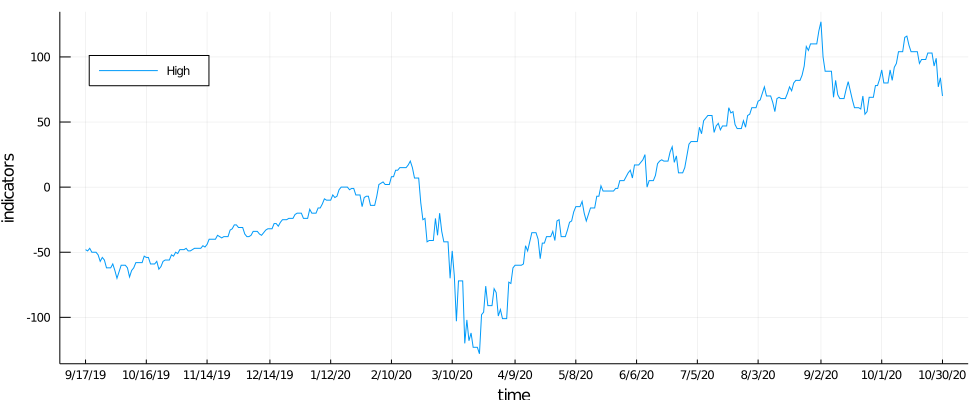

In [10]:
using Plots
count = size(df)[1]
rows = 1:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(          dates, # x-axis: dates
               [  df[rows,3]    ], # y-axis
    label    = [ columns[3]    ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

# Averages

In [11]:

averages005 = calculate_average(df, 5, 3)
averages030 = calculate_average(df, 30, 3)
averages090 = calculate_average(df, 90, 3)
averages180 = calculate_average(df, 180, 3)
averages365 = calculate_average(df, 365, 3)
println()

# Position on given Date

In [12]:
position = position_on_date(df, "2020-09-30")
position[1:3]

3-element Array{Float64,1}:
 83.0
 83.0
 83.0

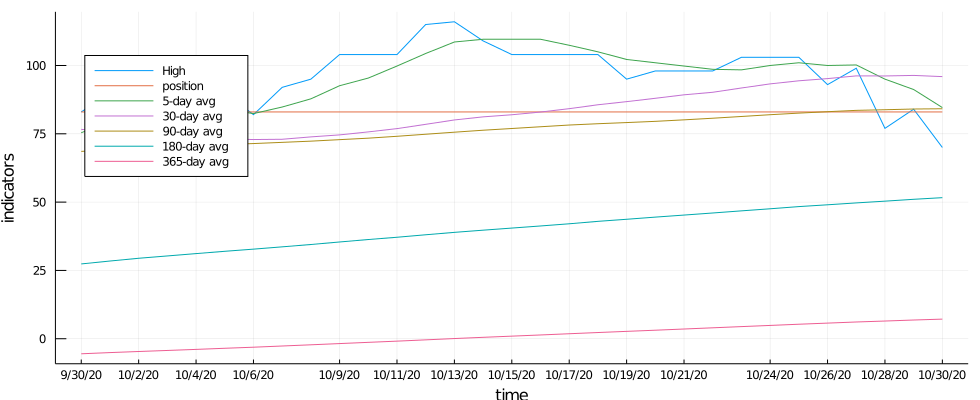

In [13]:
using Plots
count = size(df)[1]
rows = count-30:count
dates = format_dates( df[rows,2] , "m/d/yy")

gr()
plot(      dates, # x-axis: dates
        [  df[rows,3] position[rows] averages005[rows] averages030[rows] averages090[rows] averages180[rows] averages365[rows] ], # y-axis
    label    = 
        [ columns[3] "position" "5-day avg" "30-day avg" "90-day avg" "180-day avg" "365-day avg" ""  ],
    legend   =:topleft, 
              # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "indicators",
    size     = (980, 400), # width, height
    layout = (1, 1) # number of graphs: vertically, horizontally
    )

[back to top](#Table-of-Contents)
<hr/>

# Save DataFrame to CSV file

In [14]:
save_dataset(df, dataset_file_name);